In [148]:
# Importing the librairies 
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from ipywidgets import interact
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data exploration

In [149]:
# reading the dataset
data = pd.read_csv('dataset.csv')
data

,time,accelerometer#mean,accelerometer#min,accelerometer#max,accelerometer#std,gyroscope#mean,gyroscope#min,gyroscope#max,gyroscope#std,sound#mean,sound#min,sound#max,sound#std,target
0,78.0,9.811476,9.758895,9.849411,0.014626,0.001651,0.000000,0.003533,0.000737,0.000000,0.000000,0.000000,0.000000,Still
1,145.0,9.939207,7.707437,17.146631,1.775944,0.036326,0.011669,0.059388,0.020290,89.200210,89.065143,89.335277,0.191013,Car
2,150.0,9.827178,9.804817,9.849262,0.011199,0.001525,0.000000,0.002609,0.000713,0.000000,0.000000,0.000000,0.000000,Still
3,105.0,9.673039,7.659674,12.304298,0.862553,0.036440,0.020463,0.052512,0.010553,87.470377,87.470377,87.470377,2.284186,Car
4,77.0,9.993466,8.965621,10.891645,0.504117,0.183202,0.020667,0.380875,0.098819,89.770732,89.770732,89.770732,0.006389,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,4.0,10.066610,4.564648,13.414389,3.373972,0.627658,0.076466,1.579251,0.389385,0.000000,0.000000,0.000000,0.000000,Walking
5889,32.0,9.964271,8.768007,11.454213,0.665529,0.018259,0.011517,0.030134,0.005964,0.000000,0.000000,0.000000,0.000000,Train
5890,86.0,9.812893,9.772881,9.862587,0.017633,0.001803,0.000000,0.004520,0.000904,0.000000,0.000000,0.000000,0.000000,Still
5891,199.0,9.831144,9.807347,9.874450,0.013485,0.003652,0.002732,0.004571,0.001301,0.000000,0.000000,0.000000,0.000000,Still


In [150]:
# size of the dataset
data.shape

(5893, 14)

There is 14 columns and 5893 records. 

In [151]:
# name of the columns
print("Name of the columns : ", list(data.columns))

Name of the columns :  ['time', 'accelerometer#mean', 'accelerometer#min', 'accelerometer#max', 'accelerometer#std', 'gyroscope#mean', 'gyroscope#min', 'gyroscope#max', 'gyroscope#std', 'sound#mean', 'sound#min', 'sound#max', 'sound#std', 'target']


In [152]:
# number of values per categories in the target columns
data['target'].value_counts()

Car        1180
Still      1179
Train      1179
Bus        1178
Walking    1177
Name: target, dtype: int64

In [153]:
# Statistic description of the dataset
data.describe()

,time,accelerometer#mean,accelerometer#min,accelerometer#max,accelerometer#std,gyroscope#mean,gyroscope#min,gyroscope#max,gyroscope#std,sound#mean,sound#min,sound#max,sound#std
count,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000
mean,117.731716,10.007976,8.426262,12.247691,0.982987,0.274351,0.078560,0.645235,0.166669,65.445964,65.218848,65.672381,1.318661
std,126.474151,0.655949,1.783007,5.178436,1.505615,0.529583,0.195519,1.293279,0.327209,32.136026,32.129213,32.180745,2.871450
min,3.000000,7.369055,0.337166,8.801019,0.001286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,9.737143,7.805295,10.015566,0.078055,0.007377,0.002044,0.014884,0.003247,58.402467,57.741088,58.879778,0.000000
50%,70.000000,9.850143,9.123124,10.602081,0.369163,0.035267,0.008777,0.078057,0.019004,79.475484,79.086780,79.862550,0.037179
75%,152.000000,10.078998,9.691731,12.291575,1.058376,0.205268,0.054033,0.532054,0.135955,89.722940,89.720104,89.726909,1.487859
max,682.000000,17.427391,12.115013,66.886376,12.879851,5.662153,3.232744,28.860752,4.980892,90.308734,90.308734,90.308734,26.835546


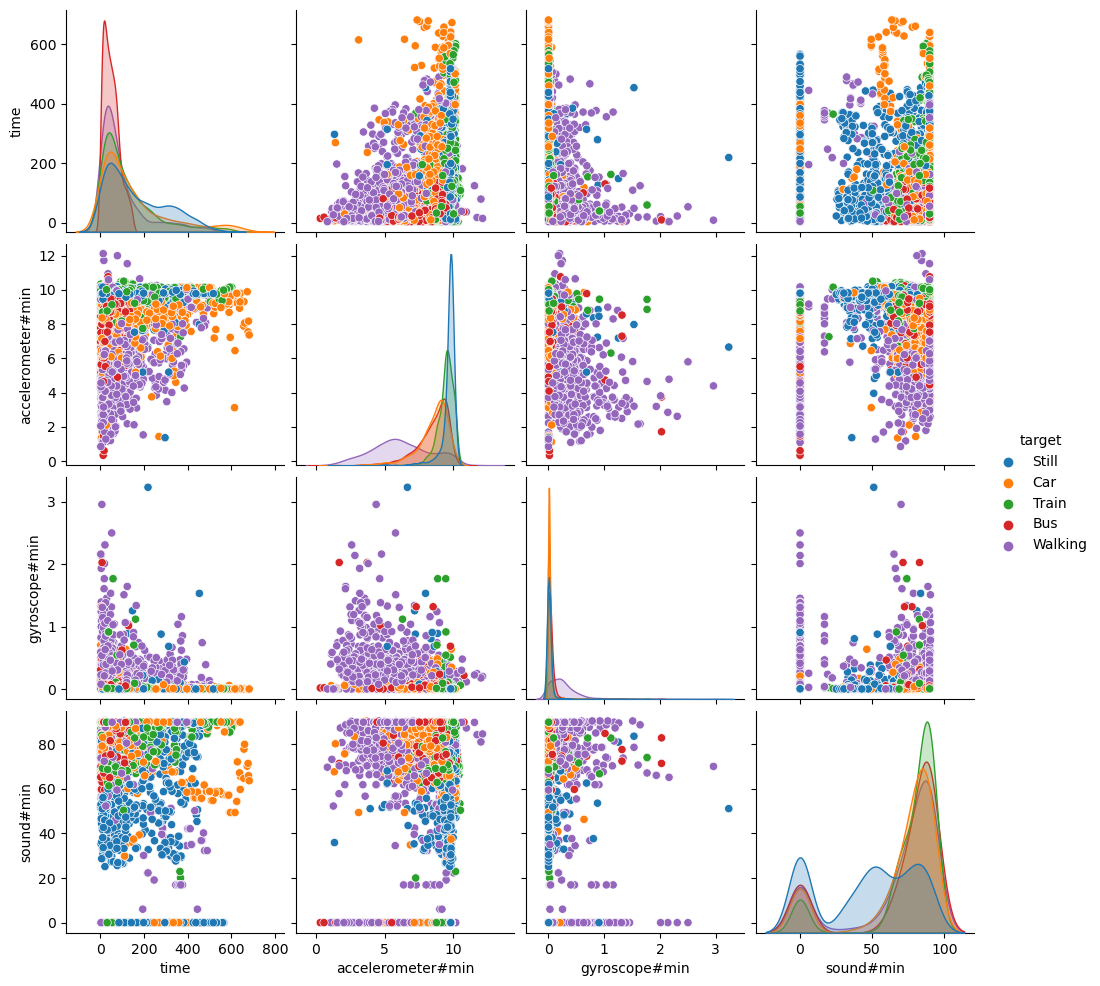

In [154]:
sns.pairplot(data[['time', 'accelerometer#min', 'gyroscope#min',  'sound#min', 'target']], hue='target')

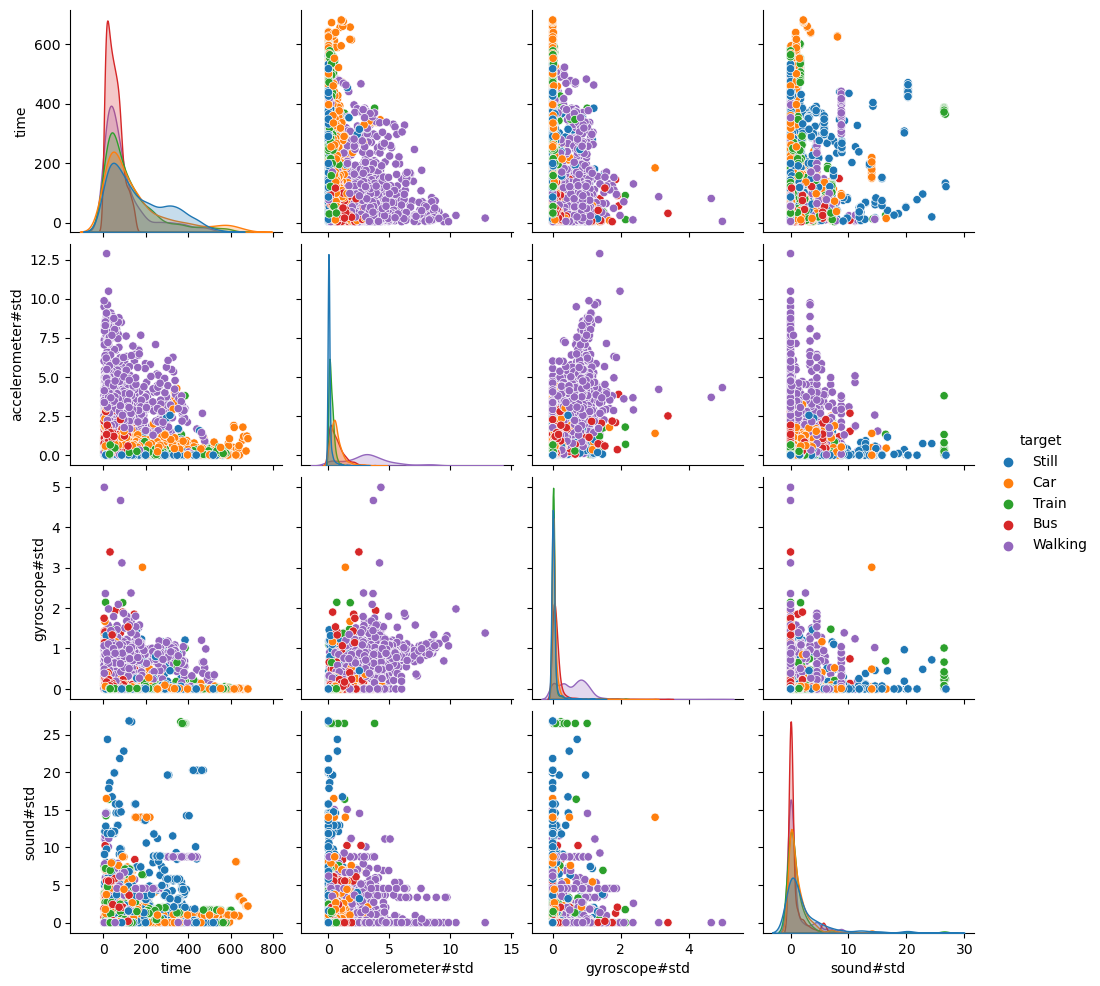

In [155]:
sns.pairplot(data[['time', 'accelerometer#std', 'gyroscope#std',  'sound#std', 'target']], hue='target')

Text(0.5, 1.0, 'Correlation Heatmap')

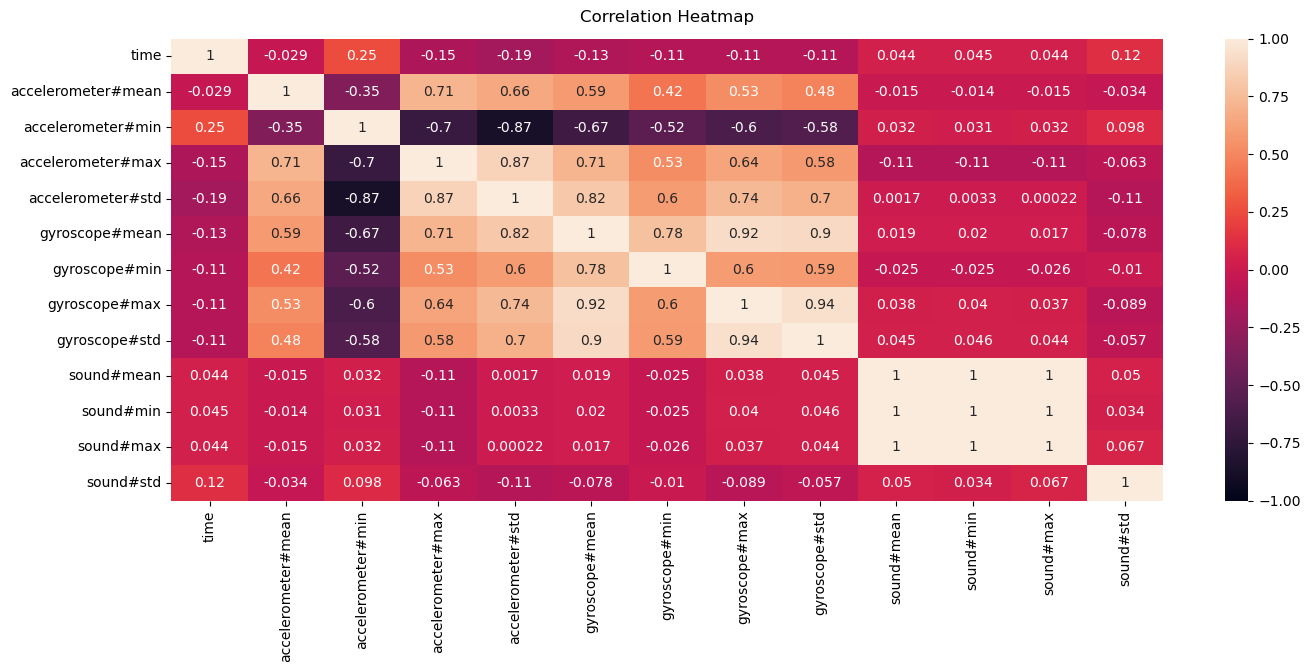

In [156]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

<AxesSubplot:ylabel='target'>

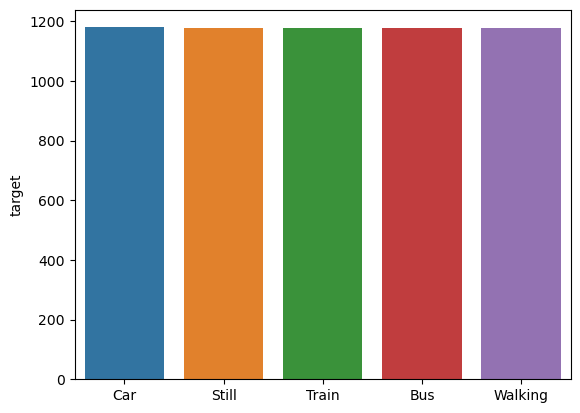

In [157]:
sns.barplot(x=data.target.value_counts().index,y=data.target.value_counts())

In [158]:
# Counting null values for each columns
data.isnull().sum()

time                  0
accelerometer#mean    0
accelerometer#min     0
accelerometer#max     0
accelerometer#std     0
gyroscope#mean        0
gyroscope#min         0
gyroscope#max         0
gyroscope#std         0
sound#mean            0
sound#min             0
sound#max             0
sound#std             0
target                0
dtype: int64

There is no null values in the data

# Modeling

In [159]:
# encoding the target variable
encoding = {'Still' : 0, 'Walking' : 1, 'Bike' : 2, 'Car' : 3, 'Bus' : 4, 'Train' : 5, }
data.target = [encoding[x] for x in data.target]

In [160]:
# separate features and target 
X = data.drop(columns=['target'])
y = data['target']

In [161]:
y.unique()

array([0, 3, 5, 4, 1])

In [162]:
# train/test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [163]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

## KNN

In [164]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=2)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
knn_accuracy = accuracy_score(y_test,y_pred)
knn_f1_score = f1_score(y_test, y_pred, average='macro')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.87      0.71       243
           1       0.76      0.83      0.80       223
           3       0.47      0.47      0.47       239
           4       0.54      0.52      0.53       228
           5       0.63      0.34      0.44       246

    accuracy                           0.60      1179
   macro avg       0.60      0.61      0.59      1179
weighted avg       0.60      0.60      0.59      1179



In [165]:
# saving the classification report as a csv file
knn_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
knn_report.to_csv("knn_report.csv")

## Gradient Boosting Classifier

In [166]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(n_estimators = 200,learning_rate = 0.3)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
gbc_accuracy = accuracy_score(y_test,y_pred)
gbc_f1_score = f1_score(y_test, y_pred, average='macro')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       243
           1       0.94      0.97      0.95       223
           3       0.88      0.84      0.86       239
           4       0.90      0.89      0.89       228
           5       0.85      0.91      0.88       246

    accuracy                           0.90      1179
   macro avg       0.91      0.90      0.90      1179
weighted avg       0.91      0.90      0.90      1179



In [167]:
# saving the classification report as a csv file
gbc_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
gbc_report.to_csv("gbc_report.csv")

## Decision Tree Classifier

In [168]:

from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
dtc_accuracy = accuracy_score(y_test,y_pred)
dtc_f1_score = f1_score(y_test, y_pred, average='macro')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       243
           1       0.86      0.91      0.89       223
           3       0.71      0.69      0.70       239
           4       0.79      0.77      0.78       228
           5       0.72      0.74      0.73       246

    accuracy                           0.79      1179
   macro avg       0.79      0.79      0.79      1179
weighted avg       0.79      0.79      0.79      1179



In [169]:
# saving the classification report as a csv file
dtc_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
dtc_report.to_csv("dtc_report.csv")

In [170]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz 

In [171]:
y_train.astype(str).values

array(['3', '1', '1', ..., '4', '5', '5'], dtype=object)

## Random Forest

In [172]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators = 100, random_state=1)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
rf_accuracy = accuracy_score(y_test,y_pred)
rf_f1_score = f1_score(y_test, y_pred, average='macro')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       243
           1       0.92      0.96      0.94       223
           3       0.82      0.74      0.78       239
           4       0.85      0.82      0.83       228
           5       0.81      0.89      0.85       246

    accuracy                           0.87      1179
   macro avg       0.87      0.87      0.86      1179
weighted avg       0.86      0.87      0.86      1179



In [173]:
# saving the classification report as a csv file
rf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
rf_report.to_csv("rf_report.csv")

## Tree visualization

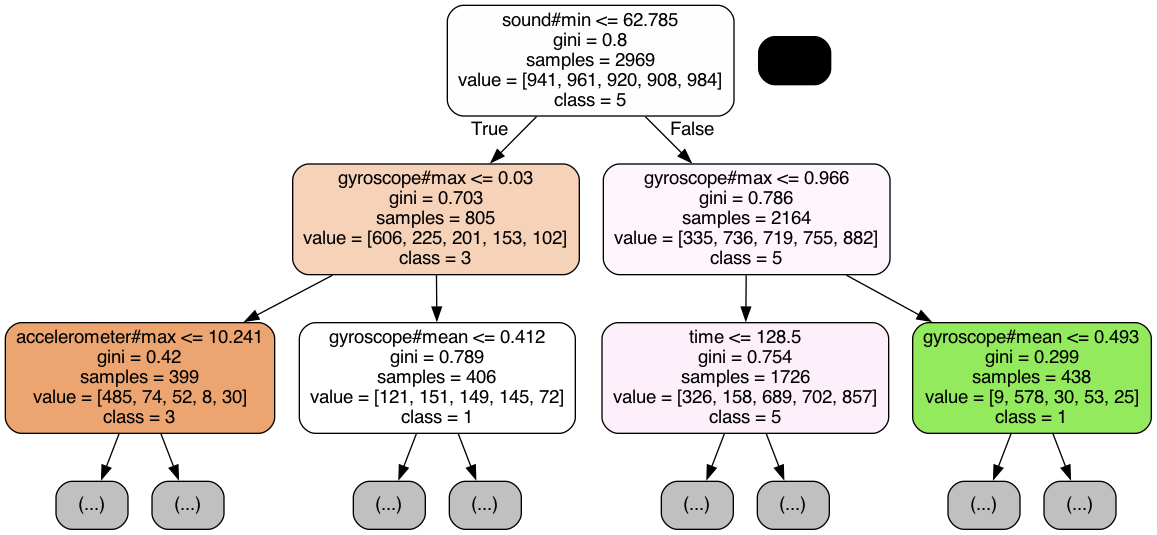

In [175]:
# plotting tree with a depth of 3
dot_data = StringIO()  

export_graphviz(rf.estimators_[99],
                out_file=dot_data,
                filled=True,
                rounded=True,
                feature_names=x_train.columns, 
                class_names=y_train.astype(str).values, max_depth=2)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())